In [23]:
import numpy as np
import pandas as pd
import warnings    # `do not disturb`
warnings.filterwarnings('ignore')
import pickle
import time
import datetime

# model performance
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [24]:
df = pd.read_csv("./../g-research-crypto-forecasting/train.csv")

In [25]:
df.size

242368060

In [26]:
df.isna().sum()

timestamp         0
Asset_ID          0
Count             0
Open              0
High              0
Low               0
Close             0
Volume            0
VWAP              9
Target       750338
dtype: int64

In [27]:
df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [31]:
df = df[df["Asset_ID"]==0]

In [32]:
df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.38,8.530000,-0.014399
9,1514764920,0,7.0,8.5300,8.5300,8.5145,8.5145,71.39,8.520215,-0.015875
17,1514764980,0,45.0,8.5065,8.5299,8.4848,8.4848,1546.82,8.501394,-0.015410
25,1514765040,0,14.0,8.5009,8.5066,8.4744,8.5009,125.80,8.479810,-0.012524
33,1514765100,0,5.0,8.5007,8.5007,8.4560,8.4560,125.01,8.458435,-0.005940


In [33]:
df.isna().sum()

timestamp        0
Asset_ID         0
Count            0
Open             0
High             0
Low              0
Close            0
Volume           0
VWAP             0
Target       13415
dtype: int64

In [34]:
df_x = df.drop(["Close"], axis=1).fillna(0).to_numpy()
df_y = df["Close"].fillna(0).to_numpy()

In [35]:
size = len(df_x)
train_size = int(size*(0.8))
print(size, train_size)

1942619 1554095


In [36]:
x_train = df_x[:train_size]
y_train = df_y[:train_size]

x_test = df_x[train_size:]
y_test = df_y[train_size:]

In [37]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()

In [38]:
# x_train_s = sc.fit_transform(x_train)
# x_test_s = sc.fit_transform(x_test)

In [39]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# model = lr.fit(x_train_s, y_train)
model = lr.fit(x_train, y_train)

In [40]:
# y_test_predicted = lr.predict(x_test_s)
y_test_predicted = lr.predict(x_test)

In [41]:
print(f"{np.corrcoef(y_test_predicted, y_test)[0,1]:.2f}")

1.00


In [42]:
y_test[:10]

array([32.47275, 32.4912 , 32.4461 , 32.4354 , 32.48685, 32.4916 ,
       32.5    , 32.4901 , 32.5213 , 32.4692 ])

In [43]:
y_test_predicted[:10]

array([32.47919925, 32.48782655, 32.45378419, 32.44011784, 32.47373896,
       32.49625417, 32.51588013, 32.49460998, 32.51470453, 32.48863232])

In [44]:
import matplotlib.pyplot as plt

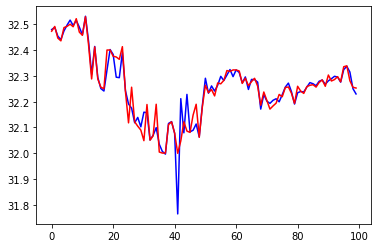

In [45]:
plt.plot(y_test_predicted[:100], color="blue", label="output")
plt.plot(y_test[:100], color="red", label="output")
plt.show()